# Data Visualization 

We are going to perform an analysis of our dataset, seeing class sizes and distributions, confusion matrices and other visualizations

## Setup and Import Libraries

This section prepares the environment for data visualization:

- **Visualization Libraries**: `seaborn` and `matplotlib` for creating statistical graphics
- **Data Manipulation**: `pandas` and `numpy` for data handling and numerical operations
- **Path Configuration**: `sys` and `os` to add parent directory to Python path
- **Custom Module**: Import `HousePricingDataModule` from the project's dataset module

This setup allows us to access both raw data files and the preprocessed data loader used in model training.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
# Add the parent directory to sys.path to allow imports from my_project
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from my_project.dataset import HousePricingDataModule


## Load Training Data via DataModule

Here we instantiate the custom `HousePricingDataModule` and access the training dataset:

1. Create a data module instance
2. Call `setup('fit')` to prepare train/validation splits
3. Access the training dataloader
4. Display the underlying dataset

This demonstrates how the model receives data during training, ensuring our visualizations reflect the same data distribution the model sees.

In [3]:
dataModule = HousePricingDataModule()
dataModule.setup('fit')
train_df = dataModule.train_dataloader()

train_df.dataset

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,0.891313,-1.376391,1.238688,1.270707,1.175831,-1.214614,-0.555229,1.020008
1,-0.473538,-0.661382,-1.202076,-0.998125,-1.708519,0.004062,-1.239290,-0.805075
2,-0.271968,-1.376391,1.238688,1.029342,-0.949502,-1.214614,1.496953,-0.281750
3,0.066412,-1.376391,-1.202076,0.401792,0.778210,0.004062,-0.213199,-0.018299
4,-0.905822,0.053626,-1.202076,-1.336036,-0.375051,1.222739,-1.239290,-1.067900
...,...,...,...,...,...,...,...,...
595,1.100978,-1.376391,0.018306,0.112154,1.135067,0.004062,-0.555229,1.109040
596,-0.904203,1.483642,0.018306,1.656891,1.043101,1.222739,1.154922,-0.540960
597,-1.167297,0.053626,-1.202076,-1.480855,0.587880,0.004062,-0.213199,-1.277162
598,1.457167,-0.661382,0.018306,0.015608,-0.167373,-1.214614,0.128831,1.315363


## Load Raw Dataset for Analysis

Load the original raw dataset directly from CSV to perform exploratory data analysis:

- **File**: `house_price_regression_dataset.csv` from the raw data directory
- **Features (X)**: All columns except the target variable `House_Price`
- **Target (y)**: The `House_Price` column we want to predict

Display the dataset shape to understand dimensionality (number of samples and features) and preview the first few rows.

In [ ]:
df = pd.read_csv('../data/raw/house_price_regression_dataset.csv')
df.head()

X = df.drop(columns=['House_Price'])
y = df['House_Price']
print(X.shape, y.shape)
X.head()

(1000, 7) (1000,)


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8


## Distribution Analysis: Feature Histograms

Create a comprehensive visualization grid showing the distribution of all features:

- **Layout**: 3x3 grid with individual histograms for each input feature
- **Orange histograms**: Show distribution of predictor variables (e.g., bedrooms, square footage)
- **Blue histogram** (bottom, spanning 2 columns): Shows the target variable `House_Price` distribution
- **KDE overlay**: Kernel Density Estimation curves provide smoothed probability density
- **Output**: Saved as both SVG (scalable) and PDF formats for reports

**Purpose**: Understand the shape, spread, and potential skewness of each variable, identify outliers, and assess if transformations may be needed.

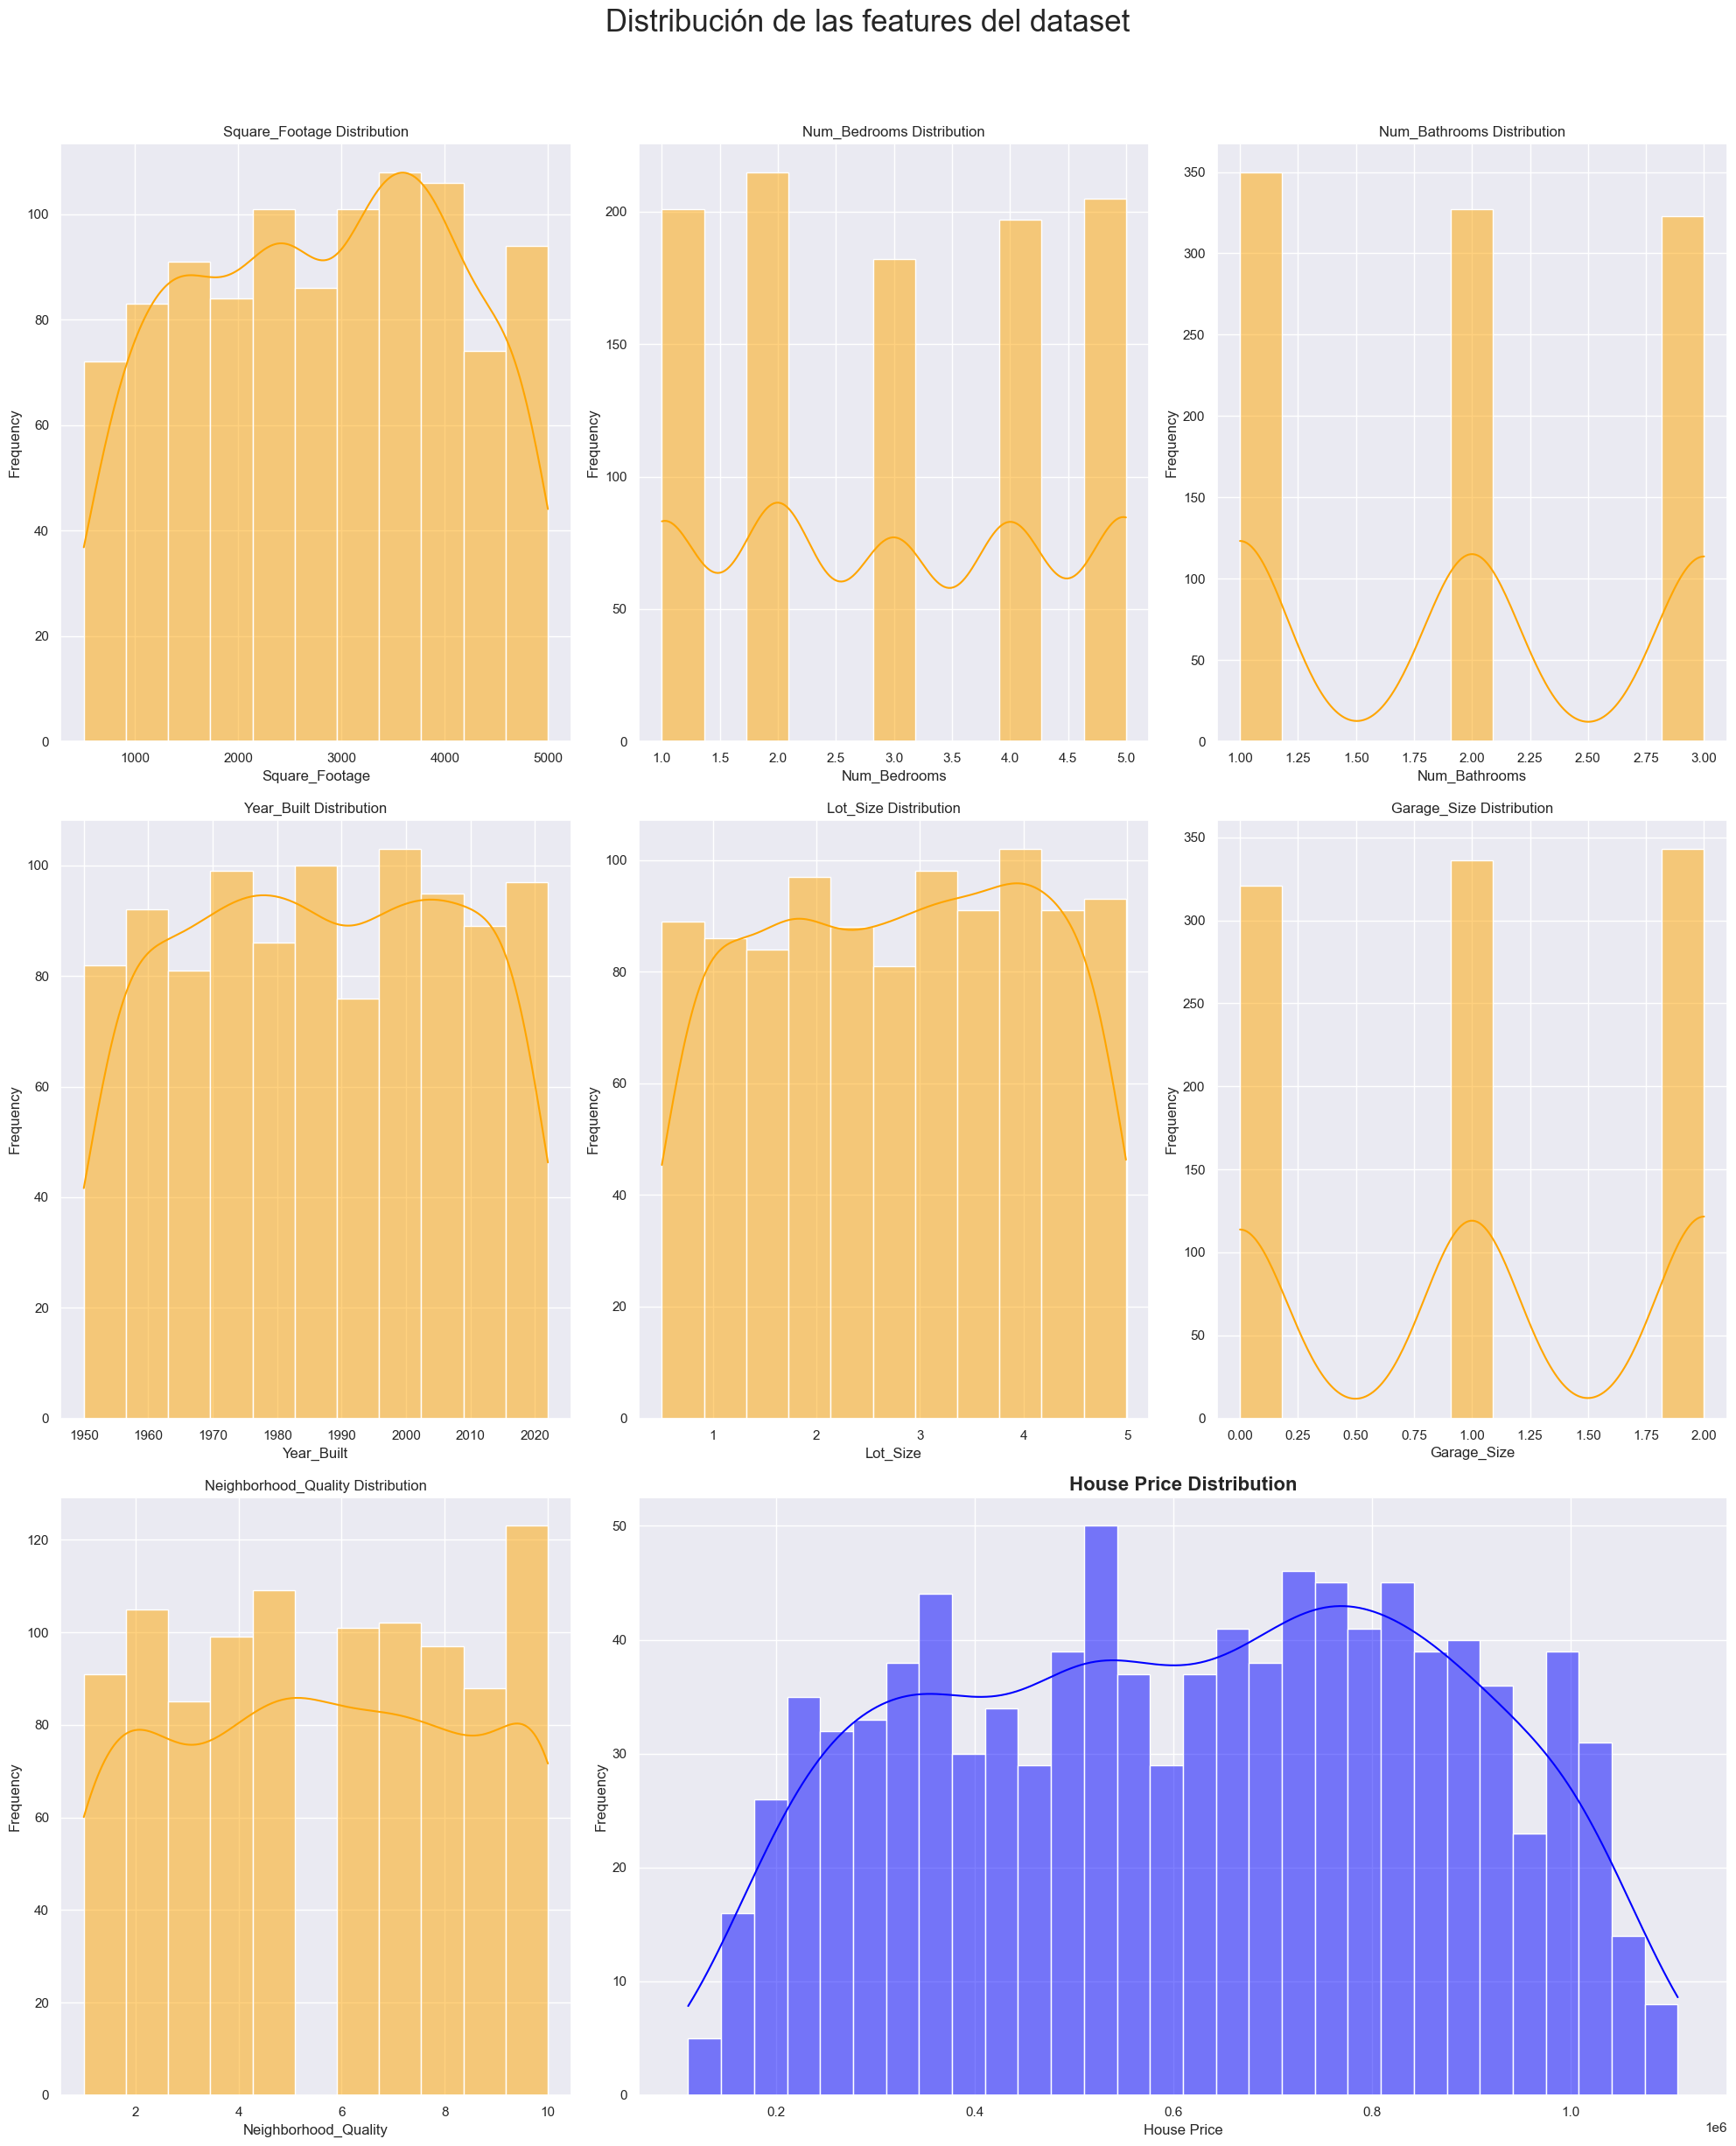

In [5]:
features = df.columns.drop('House_Price')
fig = plt.figure(figsize=(20, 25))
sns.set_theme(style="darkgrid")
gs = plt.GridSpec(3, 3, figure=fig)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = fig.add_subplot(gs[row, col])
    sns.histplot(X[feature].dropna(), color="orange", kde=True, ax=ax)
    ax.set_title(f"{feature} Distribution")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
axe = fig.add_subplot(gs[2, 1:])
sns.histplot(y, color="blue", kde=True,bins=30)
axe.set_title(f"House Price Distribution", fontsize=16, fontdict={'weight': 'bold'})
axe.set_xlabel("House Price")
axe.set_ylabel("Frequency")

fig.suptitle('Distribución de las features del dataset\n\n\n', fontsize=25)
plt.tight_layout()
plt.savefig("../reports/figures/House_Pricing_and_features_histplot.svg", dpi=150)
plt.savefig("../reports/figures/House_Pricing_and_features_histplot.pdf", dpi=150)
plt.show()

## Categorical Feature Analysis with Violin Plots

Explore the relationship between discrete/categorical features and house prices:

**Selected Variables**:
- `Num_Bedrooms` - Number of bedrooms
- `Num_Bathrooms` - Number of bathrooms  
- `Neighborhood_Quality` - Quality rating of neighborhood
- `Garage_Size` - Garage capacity

**Violin Plot Benefits**:
- Shows the **distribution** of house prices for each category value
- **Width** indicates density (more houses at that price point)
- **Inner box** shows quartiles and median
- **Color palette**: Pastel colors for clear differentiation

**What to look for**: Whether certain values (e.g., more bedrooms) correlate with higher prices, and how much price variation exists within each category.

By analyzing the histograms, we observed that some of the numerical variables are in fact discrete rather than continuous. Although these variables are stored as numeric values, they can be treated as categorical (qualitative) variables rather than continuous ones. This is because they represent discrete, fixed integer counts (e.g., number of bedrooms, number of bathrooms, garage spaces, or neighborhood quality rating). Unlike continuous variables such as square footage or price, these values do not capture a smooth range but rather distinct categories. For example, the difference between having 1 and 2 garages is not the same as between 2 and 3, and fractional values (like 2.5 garages) don’t make sense.

Therefore, it is often more appropriate to handle them as ordinal or categorical features, depending on the context, instead of purely numerical continuous variables.

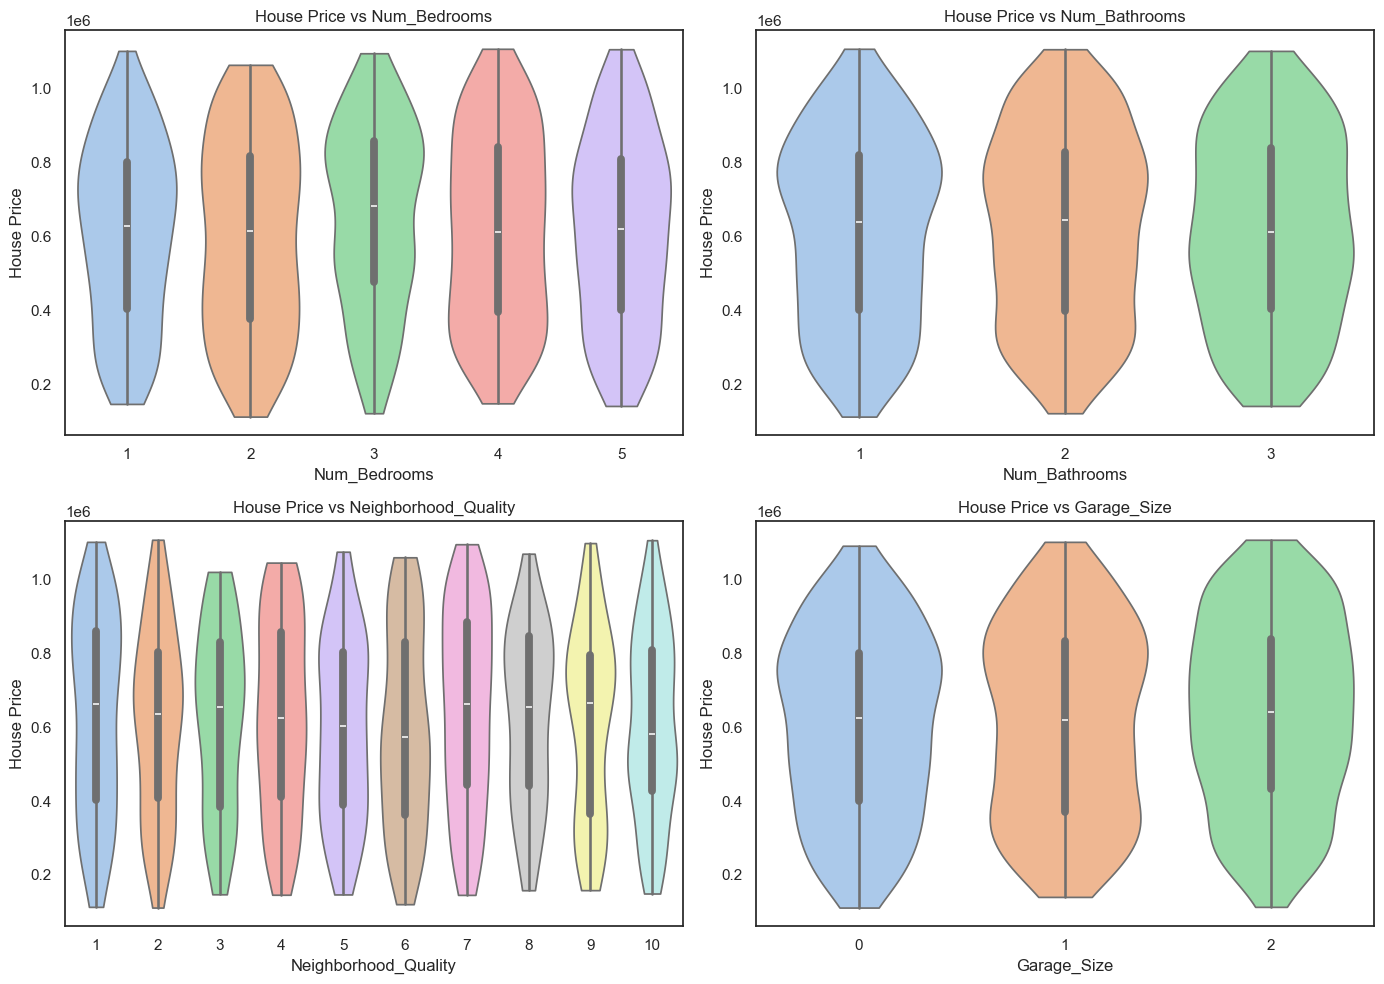

In [ ]:
variables = ["Num_Bedrooms", "Num_Bathrooms", "Neighborhood_Quality", "Garage_Size"]


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.violinplot(
        data=df,
        x=var,
        y=y,
        ax=axes[i],
        inner="box",
        cut=0,
        hue = var,
        palette="pastel",
        legend=False
    )
    axes[i].set_title(f"House Price vs {var}", fontsize=12)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("House Price")

plt.tight_layout()
plt.savefig("../reports/figures/House_Pricing_vs_categorical_features_Violin_plots.svg", dpi=150)
plt.savefig("../reports/figures/House_Pricing_vs_categorical_features_Violin_plots.pdf", dpi=150)
plt.show()

## Correlation Heatmap with Hierarchical Clustering

Analyze relationships between all numeric variables in the dataset:

**Process**:
1. Calculate pairwise correlation matrix between all features
2. Apply **hierarchical clustering** to group similar features together
3. Reorder the matrix based on clustering results
4. Display as a heatmap with correlation coefficients

**Interpretation**:
- **Red colors**: Positive correlation (variables increase together)
- **Blue colors**: Negative correlation (one increases as other decreases)
- **White/neutral**: Little to no correlation
- **Clustering**: Groups features with similar correlation patterns, revealing feature relationships

**Key insights**: Identify strongly correlated features (potential multicollinearity) and which features most influence house price.

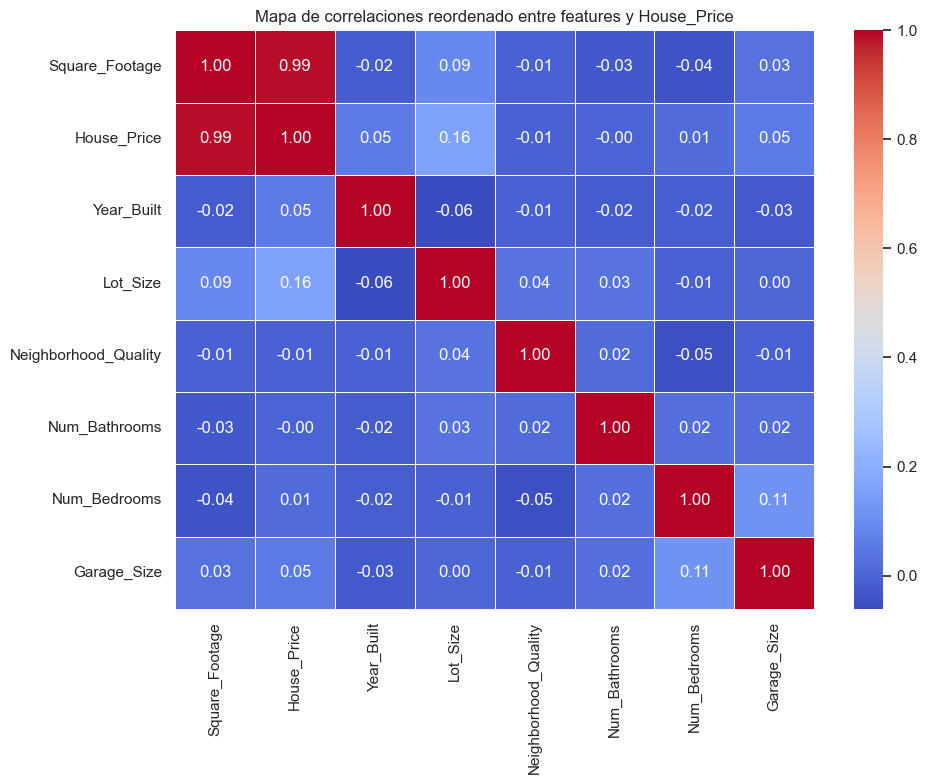

In [7]:
# Calculate the correlation matrix
corr_matrix = df.corr()
# Seaborn returns the reordered indices
cg = sns.clustermap(corr_matrix, cmap="coolwarm", linewidths=0.5, figsize=(10, 8))
ordered_indices = cg.dendrogram_row.reordered_ind
plt.close()  # close the clustermap plot to avoid displaying it

# Reorder the correlation matrix
corr_matrix = corr_matrix.iloc[ordered_indices, ordered_indices]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.set_theme(style="white")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de correlaciones reordenado entre features y House_Price")
plt.tight_layout()
plt.savefig("../reports/figures/House_Pricing_correlation_heatmap_ordered.svg", dpi=150)
plt.savefig("../reports/figures/House_Pricing_correlation_heatmap_ordered.pdf", dpi=150)
plt.show()

## Regression Analysis: Square Footage vs House Price

Deep dive into the strongest predictor identified in the correlation analysis.

Since the clustermap revealed a strong positive correlation between House Price and Square Footage, it is appropriate to further explore this relationship with a regression plot (regplot). The regplot allows us to visualize not only the distribution of individual data points but also the linear trend between the two variables.

By plotting House Price against Square Footage with a regression line, we can:

- Confirm the strength and direction of the correlation.

- Assess whether the relationship appears linear or if there are deviations.

- Identify potential outliers that do not follow the general trend.

This visualization supports the initial correlation analysis and provides a more intuitive understanding of how increases in Square Footage are associated with increases in House Price.

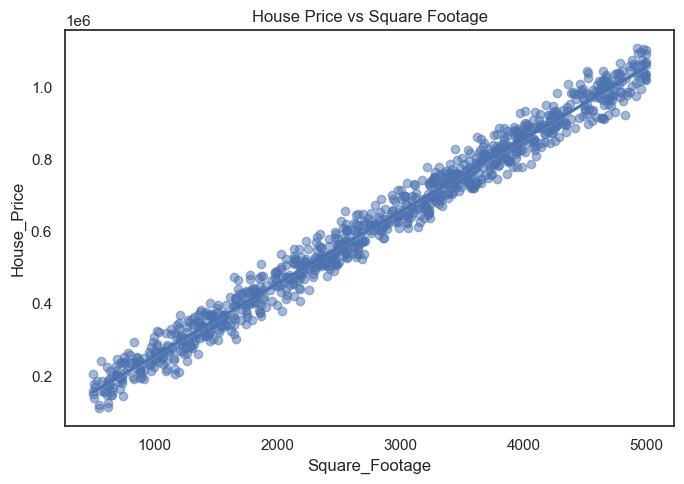

In [10]:
plt.figure(figsize=(7, 5))
sns.regplot(data=df, x="Square_Footage", y="House_Price", scatter_kws={"alpha":0.5})
plt.title("House Price vs Square Footage")
plt.tight_layout()
plt.savefig("../reports/figures/square_footage_house_price_regplot.svg", dpi=150)
plt.savefig("../reports/figures/square_footage_house_price_regplot.pdf", dpi=150)
plt.show()
plt.close()